## Combining all data sets, adding missing value by ML

As we have many data sets with different periods and frequencies we add data to the datasets with less data by using ML methods.

First we will look for the dataset that have most data in period.

In [230]:
# import og nesecery libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from pandas_datareader import data as pdr

## Reading SP500 and cleaning the data

In [231]:
# reading data from CSV
df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')

In [232]:
# Converting Date column to DateTime format
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# dropping unnecesery columns
df_sp500 = df_sp500.drop(columns=['Ticker', 'Volume', 'Adj Close', 'High','Low', 'Open'])

df_sp500.rename(columns={'Close':'Close SP500'}, inplace=True)

In [233]:
df_sp500

,Date,Close SP500
0,1962-01-02,3.475125
1,1962-01-03,3.501254
2,1962-01-04,3.501254
3,1962-01-05,3.409804
4,1962-01-08,3.390207
...,...,...
4237168,2024-09-23,193.589996
4237169,2024-09-24,193.690002
4237170,2024-09-25,191.529999
4237171,2024-09-26,194.869995


In [234]:
# Group by Date and calculate the sum for each column
df_sp500_sum_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'mean',
}).reset_index()

# Group by Date and calculate the mean for each column
df_sp500_mean_of_ticker = df_sp500.groupby('Date').agg({
    'Close SP500': 'mean',
}).reset_index()


In [235]:
df_sp500.tail(10)

,Date,Close SP500
4237163,2024-09-16,194.250000
4237164,2024-09-17,195.710007
4237165,2024-09-18,196.479996
4237166,2024-09-19,193.240005
4237167,2024-09-20,192.639999
4237168,2024-09-23,193.589996
4237169,2024-09-24,193.690002
4237170,2024-09-25,191.529999
4237171,2024-09-26,194.869995
4237172,2024-09-27,194.789993


In [236]:
df_gold = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/cleaned_gold_data.csv')

In [237]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])

df_gold = df_gold.drop(columns=(['Open', 'High', 'Low', 'Change %']))

df_gold.rename(columns={'Price':'Close Gold'}, inplace=True)

## Reading Inflation and interest and cleaning the data

In [238]:
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')
df_interest_2017_to_now = pd.read_excel('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/interest_rate_2017_now_cleaned.xlsx')

In [239]:
df_interest_inflation

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [240]:
df_interest_2017_to_now

,Effective Date,Rate (%)
0,09/16/2024,5.33
1,09/13/2024,5.33
2,09/12/2024,5.33
3,09/11/2024,5.33
4,09/10/2024,5.33
...,...,...
1932,01/09/2017,0.66
1933,01/06/2017,0.66
1934,01/05/2017,0.66
1935,01/04/2017,0.66


In [241]:
# drop all columns we don't need
df_interest_inflation_dropped = df_interest_inflation.drop(columns=['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate'])

# Combine the columns Year, Month, Day into one DateTime column
df_interest_inflation_dropped['Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

# Insert the new column at the beginning
df_interest_inflation_dropped.insert(0, 'Date', df_interest_inflation_dropped.pop('Date'))

# Drop Year, Month and Day
df_interest_inflation_dropped = df_interest_inflation_dropped.drop(columns=['Year', 'Month', 'Day'])

In [242]:
df_interest_inflation_dropped.ffill(inplace=True)
df_interest_inflation_dropped.bfill(inplace=True)

df_interest_inflation_dropped.info()
df_interest_inflation_dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          904 non-null    datetime64[ns]
 1   Effective Federal Funds Rate  904 non-null    float64       
 2   Inflation Rate                904 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


,Date,Effective Federal Funds Rate,Inflation Rate
0,1954-07-01,0.80,3.2
1,1954-08-01,1.22,3.2
2,1954-09-01,1.06,3.2
3,1954-10-01,0.85,3.2
4,1954-11-01,0.83,3.2
...,...,...,...
899,2016-12-14,0.54,2.2
900,2017-01-01,0.65,2.3
901,2017-02-01,0.66,2.2
902,2017-03-01,0.66,2.2


In [243]:
df_interest_inflation_dropped.rename(columns={'Effective Federal Funds Rate':'Interest Rate'}, inplace=True)

df_interest_inflation_dropped

,Date,Interest Rate,Inflation Rate
0,1954-07-01,0.80,3.2
1,1954-08-01,1.22,3.2
2,1954-09-01,1.06,3.2
3,1954-10-01,0.85,3.2
4,1954-11-01,0.83,3.2
...,...,...,...
899,2016-12-14,0.54,2.2
900,2017-01-01,0.65,2.3
901,2017-02-01,0.66,2.2
902,2017-03-01,0.66,2.2


In [244]:
# removing all columns unless date and 
df_interest_2017_to_now1 = df_interest_2017_to_now.filter(items=['Effective Date', 'Rate (%)'])

# Convert the current column with date to a column with datetime data type and drop the 'Effective Date'
df_interest_2017_to_now1['Date'] = pd.to_datetime(df_interest_2017_to_now1['Effective Date'])
df_interest_2017_to_now1 = df_interest_2017_to_now1.drop(columns=['Effective Date'])

In [245]:
df_interest_2017_to_now1.rename(columns={'Rate (%)':'Interest Rate'}, inplace=True)

df_interest_2017_to_now1

,Interest Rate,Date
0,5.33,2024-09-16
1,5.33,2024-09-13
2,5.33,2024-09-12
3,5.33,2024-09-11
4,5.33,2024-09-10
...,...,...
1932,0.66,2017-01-09
1933,0.66,2017-01-06
1934,0.66,2017-01-05
1935,0.66,2017-01-04


Now i will combine the to interest dataframes. as one of them goes to 2017 and the other one goes fram 2017 till 2024

In [246]:
# combining the dataframes with 'Interest Rate'
df_interest_combined = pd.concat([df_interest_inflation_dropped, df_interest_2017_to_now1])

# Sorting after 'Date'
df_interest_combined = df_interest_combined.sort_values(by='Date').reset_index(drop=True)

# Removing duplicates of dates if overlaping
df_interest_combined = df_interest_combined.drop_duplicates(subset='Date')



In [247]:
df_interest_combined.tail(30)

,Date,Interest Rate,Inflation Rate
2811,2024-08-05,5.33,NaN
2812,2024-08-06,5.33,NaN
2813,2024-08-07,5.33,NaN
2814,2024-08-08,5.33,NaN
2815,2024-08-09,5.33,NaN
2816,2024-08-12,5.33,NaN
2817,2024-08-13,5.33,NaN
2818,2024-08-14,5.33,NaN
2819,2024-08-15,5.33,NaN
2820,2024-08-16,5.33,NaN


Now merging the combinded DF with SP500

In [248]:
# Merge den kombinerede Interest Rate DataFrame med df_sp500 baseret på 'Date'
df_merged = pd.merge(df_interest_combined, df_sp500_sum_of_ticker, on='Date', how='outer')

# Sortere den endelige DataFrame efter dato
df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)

# Fjern duplikater baseret på dato og behold kun den første forekomst af hver dato
df_merged = df_merged.drop_duplicates(subset='Date', keep='first')


In [249]:
df_merged

,Date,Interest Rate,Inflation Rate,Close SP500
0,1954-07-01,0.80,3.2,NaN
1,1954-08-01,1.22,3.2,NaN
2,1954-09-01,1.06,3.2,NaN
3,1954-10-01,0.85,3.2,NaN
4,1954-11-01,0.83,3.2,NaN
...,...,...,...,...
16129,2024-09-23,NaN,NaN,222.570479
16130,2024-09-24,NaN,NaN,222.688543
16131,2024-09-25,NaN,NaN,221.535270
16132,2024-09-26,NaN,NaN,223.315329


In [250]:
df_merged.isnull().sum()

Date                  0
Interest Rate     13296
Inflation Rate    15232
Close SP500         341
dtype: int64

Merging Gold into df_merged

In [251]:
# Merging the merged_df with df_gold based on 'Date'
df_merged = pd.merge(df_merged, df_gold, on='Date', how='outer')

In [252]:
df_merged.sample(5)

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold
760,1964-08-11,NaN,NaN,6.044130,NaN
4794,1980-06-05,NaN,NaN,3.689026,581.75
13845,2014-10-23,NaN,NaN,68.729232,1232.15
3692,1976-02-24,NaN,NaN,5.068389,NaN
8720,1995-06-01,6.0,3.0,14.016986,384.45


In [253]:
duplicate_dates = df_merged[df_merged.duplicated(subset='Date')]
print(duplicate_dates)

Empty DataFrame
Columns: [Date, Interest Rate, Inflation Rate, Close SP500, Close Gold]
Index: []


Now we do the same with Oil and russell2000

In [254]:
#Reading data
russell2000_df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/russell_2000.csv')
oil_df = pd.read_csv('/Users/youssefbadran/Documents/GitHub/bi-exam-project-stock/datasets/BrentOilPrices.csv')

russell2000_df = russell2000_df.drop(columns=['Open', 'Low', 'High', 'Adj Close', 'Volume'])

oil_df['Date'] = pd.to_datetime(oil_df['Date'])
russell2000_df['Date'] = pd.to_datetime(russell2000_df['Date'])

russell2000_df.rename(columns={'Close':'Close Russell'}, inplace=True)
oil_df.rename(columns={'Price':'Close Oil'}, inplace=True)

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_94284/854897527.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df['Date'] = pd.to_datetime(oil_df['Date'])


In [255]:
russell2000_df

,Date,Close Russell
0,1987-09-10,168.970001
1,1987-09-11,170.539993
2,1987-09-14,170.429993
3,1987-09-15,169.199997
4,1987-09-16,168.919998
...,...,...
8516,2021-06-25,2334.399902
8517,2021-06-28,2322.340088
8518,2021-06-29,2308.840088
8519,2021-06-30,2310.550049


In [256]:
oil_df

,Date,Close Oil
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [257]:
start_date = "1962-01-02"
end_date = "2024-09-12"

In [258]:
# Consumer Price Index (CPI)

cpi = pdr.get_data_fred('CPIAUCSL', start=start_date, end=end_date)
cpi = cpi.ffill().reset_index()

cpi.rename(columns={'DATE':'Date'}, inplace=True)

cpi

,Date,CPIAUCSL
0,1962-02-01,30.110
1,1962-03-01,30.170
2,1962-04-01,30.210
3,1962-05-01,30.240
4,1962-06-01,30.210
...,...,...
746,2024-04-01,313.207
747,2024-05-01,313.225
748,2024-06-01,313.049
749,2024-07-01,313.534


In [259]:
# Merging the merged_df with russell2000_df based on 'Date'
df_merged = pd.merge(df_merged, russell2000_df, on='Date', how='outer')

# Merging the merged_df with oil_df based on 'Date'
df_merged = pd.merge(df_merged, oil_df, on='Date', how='outer')

# Merging the merged_df with cpi based on 'Date'
df_merged = pd.merge(df_merged, cpi, on='Date', how='outer')

In [281]:
df_merged.tail(30)

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil,CPIAUCSL
16437,2024-08-19,5.33,NaN,215.038387,2503.92,NaN,NaN,NaN
16438,2024-08-20,5.33,NaN,214.417699,2513.74,NaN,NaN,NaN
16439,2024-08-21,5.33,NaN,216.040733,2511.95,NaN,NaN,NaN
16440,2024-08-22,5.33,NaN,215.244707,2483.29,NaN,NaN,NaN
16441,2024-08-23,5.33,NaN,217.808006,2512.07,NaN,NaN,NaN
16442,2024-08-26,5.33,NaN,216.848324,2516.89,NaN,NaN,NaN
16443,2024-08-27,5.33,NaN,217.298652,2524.57,NaN,NaN,NaN
16444,2024-08-28,5.33,NaN,216.529403,2502.25,NaN,NaN,NaN
16445,2024-08-29,5.33,NaN,217.308059,2521.18,NaN,NaN,NaN
16446,2024-08-30,5.33,NaN,219.069104,2503.03,NaN,NaN,NaN


## Cleaning data
We have loads of missing values. First we remove all rows which are before 1963 af we only have 1 variable with data before 1963
then we fill in data with Machine learning

data before working with missing values <br>
Date                  0<br>
Interest Rate     13604<br>
Inflation Rate    15540<br>
Close SP500         660<br>
Close Gold         4838<br>
Close Russell      7921<br>
Close Oil          7431<br>
dtype: int64

In [261]:
#Removing rows before 1963 as we only have data of one variable before that year
df_merged_filtered = df_merged[(df_merged['Date'] >= '1963-01-01') & (df_merged['Date'] < '2024-01-01')]

# Fill missing values in 'Interest Rate' and 'Inflation Rate' using forward fill
df_merged_filtered['Interest Rate'] = df_merged_filtered['Interest Rate'].ffill()
df_merged_filtered['Inflation Rate'] = df_merged_filtered['Inflation Rate'].ffill()


/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_94284/52919316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Interest Rate'] = df_merged_filtered['Interest Rate'].ffill()
/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_94284/52919316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Inflation Rate'] = df_merged_filtered['Inflation Rate'].ffill()


In [284]:
df_merged_filtered

### Filling out CPI missing values with FFILL()

In [ ]:
df_merged_filtered.loc[:, 'CPIAUCSL'] = df_merged_filtered['CPIAUCSL'].ffill()

In [285]:
df_merged_filtered.isnull().sum()

Date                 0
Interest Rate        0
Inflation Rate       0
Close SP500        570
Close Gold        4513
Close Russell     7403
Close Oil         6913
CPIAUCSL             0
dtype: int64

In [299]:
df_merged_filtered.shape

(15924, 8)

## Removing all rows from the begging of the set with null values and the same from end bottom. the data set ends up haveing value between 1987 and 2021 with no missing values.

In [264]:
# Find den første række med NaN fra toppen
first_null_index = df_merged_filtered[df_merged_filtered.isnull().any(axis=1)].index[0]

# Find den første række med NaN fra bunden
last_null_index = df_merged_filtered[df_merged_filtered.isnull().any(axis=1)].index[-1]

# Fjern rækker før den første null række og efter den sidste null række
df_cleaned = df_merged_filtered.loc[first_null_index:last_null_index].dropna(how='any')

# Vis den rensede DataFrame
print(df_cleaned)


            Date  Interest Rate  Inflation Rate  Close SP500  Close Gold  \
6699  1987-10-01           7.29             4.3     9.135417      453.46   
6743  1987-12-01           6.77             4.2     6.578177      489.96   
6786  1988-02-01           6.58             4.3     7.237265      454.63   
6807  1988-03-01           6.58             4.4     7.478890      430.77   
6874  1988-06-01           7.51             4.5     7.484336      456.67   
...          ...            ...             ...          ...         ...   
15502 2021-02-01           0.08             2.2   147.738078     1860.16   
15522 2021-03-01           0.07             2.2   154.027629     1723.84   
15545 2021-04-01           0.07             2.2   159.628725     1730.18   
15589 2021-06-01           0.06             2.2   167.061955     1900.19   
15611 2021-07-01           0.10             2.2   171.249459     1776.60   

       Close Russell  Close Oil  CPIAUCSL  
6699      171.399994      18.50   115.000  

In [279]:
df_cleaned.isnull().sum()

Date              0
Interest Rate     0
Inflation Rate    0
Close SP500       0
Close Gold        0
Close Russell     0
Close Oil         0
CPIAUCSL          0
dtype: int64

<Axes: xlabel='Date'>

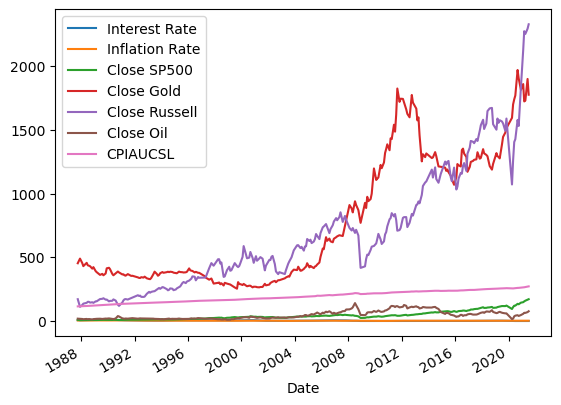

In [276]:
df_cleaned.plot.line(y=['Interest Rate', 'Inflation Rate', 'Close SP500', 'Close Gold', 'Close Russell', 'Close Oil', 'CPIAUCSL'] , x='Date')

In [294]:
df_cleaned

,Date,Interest Rate,Inflation Rate,Close SP500,Close Gold,Close Russell,Close Oil,CPIAUCSL
6699,1987-10-01,7.29,4.3,9.135417,453.46,171.399994,18.50,115.000
6743,1987-12-01,6.77,4.2,6.578177,489.96,111.269997,17.65,115.600
6786,1988-02-01,6.58,4.3,7.237265,454.63,125.720001,16.10,116.200
6807,1988-03-01,6.58,4.4,7.478890,430.77,136.259995,14.18,116.500
6874,1988-06-01,7.51,4.5,7.484336,456.67,142.869995,16.33,118.000
...,...,...,...,...,...,...,...,...
15502,2021-02-01,0.08,2.2,147.738078,1860.16,2126.159912,56.42,263.583
15522,2021-03-01,0.07,2.2,154.027629,1723.84,2275.320068,64.56,264.910
15545,2021-04-01,0.07,2.2,159.628725,1730.18,2253.899902,63.85,266.752
15589,2021-06-01,0.06,2.2,167.061955,1900.19,2294.739990,70.03,270.664


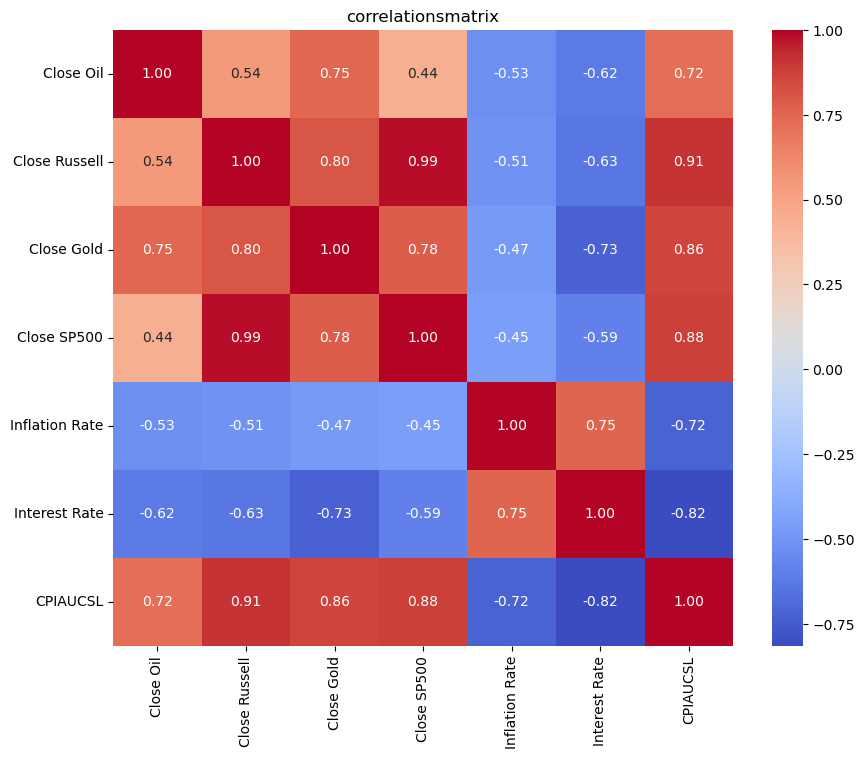

In [295]:
corrmat_df_cleaned = df_cleaned[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat_df_cleaned, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## This was just a test to see how much data we have if all null values where removed
## -----------------------

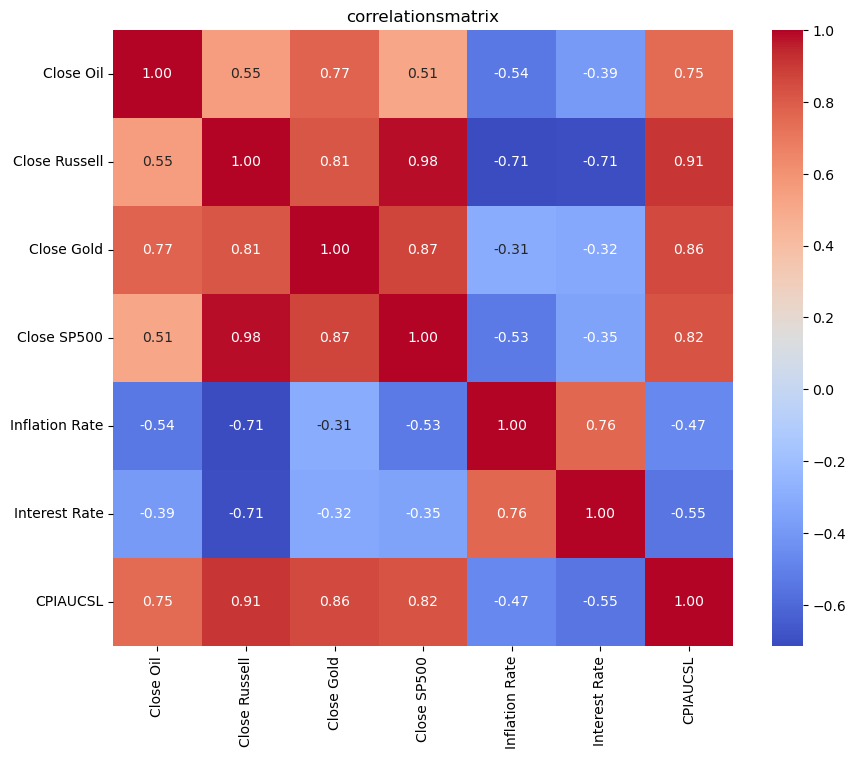

In [297]:
corrmat = df_merged[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

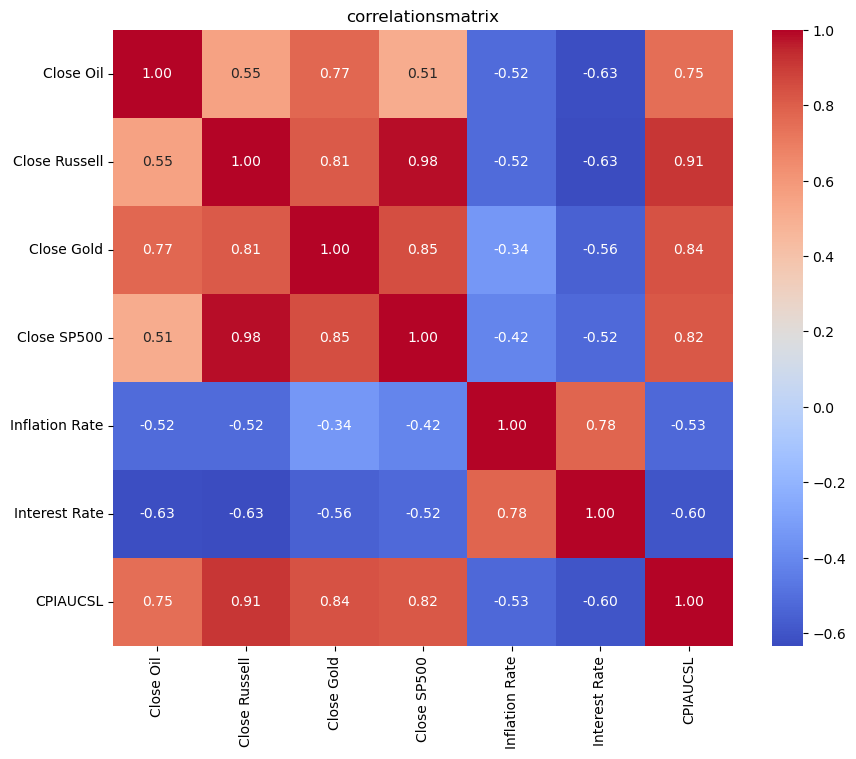

In [298]:
corrmat = df_merged_filtered[['Close Oil', 'Close Russell', 'Close Gold', 'Close SP500', 'Inflation Rate', 'Interest Rate', 'CPIAUCSL']].corr()

#Plot korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlationsmatrix')
plt.show()

## We have a lot of missing values which we want to fill out with machine learning.

Close SP500        570<br>
Close Gold        4513<br>
Close Russell     7403<br>
Close Oil         6913<br>

The correlation show great result for trying to predict the missing values

sp500 -> Rossell, gold and CPI<br>
Gold -> CPI, SP500, Russell<br>
russell -> CPI, sp500, gold<br>
oil -> cpi, gold<br>